In [167]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [168]:
#loading the data 
data = pd.read_csv("train.csv")

In [169]:
continous_var_na=[]

for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content) and data[label].isnull().sum()>0:
        continous_var_na.append(label)

In [170]:
# Dividing the data into train test
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd485d3410>,
      dtype=object)

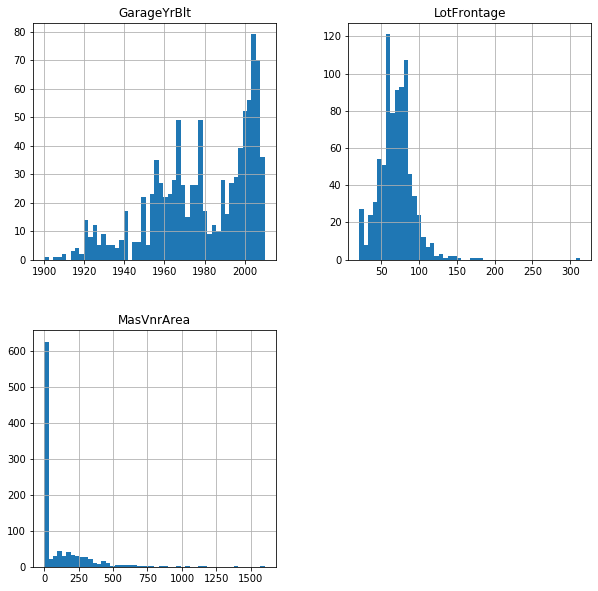

In [171]:
#creating plots
X_train[continous_var_na].hist(bins=50, figsize=(10,10))

In [172]:
#Mean,Median and mode imputer 
def impute(data, var, strategy):
    """
    This function takes in data, variable and strategy 
    and fill the missing value accordingly
    
    """
    
    
    if strategy == "mode":
        impute_val = data[var].mode()[0] #finding value using mode
        data[var+"_mode"] = data[var].fillna(impute_val) #creating new column and storing the values
        
    elif strategy == "mean":
        impute_val = X_train[var].mean()
        data[var+"_mean"] = X_train[var].fillna(impute_val)
        
    elif strategy == "median":
        impute_val = X_train[var].median()
        data[var+"_median"] = X_train[var].fillna(impute_val)

In [173]:
#plotting data after and before imputation
def plotter(data, var1, var2 ):
    
    """
    Takes dataframe and two variables
    v1 = variable before imputation
    v2 = newly vreated variable with imputed values
    
    """
    
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    data[var1].plot(kind='kde', ax=ax)
    
    data[var2].plot(kind='kde', ax=ax, color='orange')
    
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

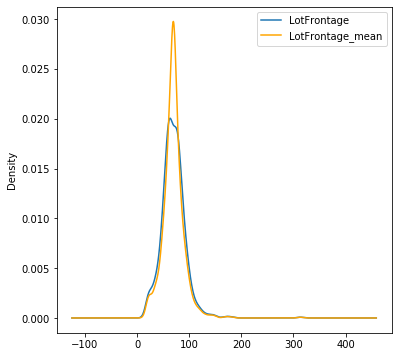

In [174]:
#imputing values for Lotfronatge using mean 

impute(X_train,"LotFrontage","mean")

#plotting the graph

plotter(X_train,"LotFrontage","LotFrontage_mean")

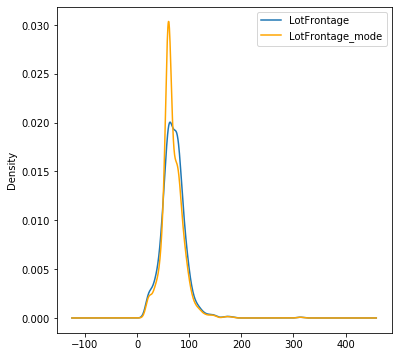

In [175]:
#imputing values for Lotfronatge using mode 

impute(X_train,"LotFrontage","mode")

#plotting the graph

plotter(X_train,"LotFrontage","LotFrontage_mode")

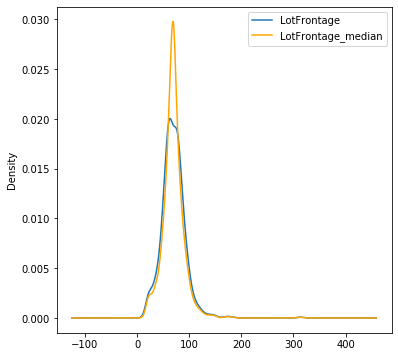

In [176]:
#imputing values for Lotfronatge using mode 
impute(X_train,"LotFrontage","median")

#plotting
plotter(X_train,"LotFrontage","LotFrontage_median")

Here we see that mean and median almost follow the same distribution after imputation,
you can try for some other variables as well

## Lets see how the statistical property changes with this imputation

In [178]:
#Applying mean imputation on missing values
for var in continous_var_na:
    impute(X_train, var, "mean")

In [183]:
#creating list of variables that have imputed
var = continous_var_na + ["LotFrontage_mean","MasVnrArea_mean","GarageYrBlt_mean"]

In [185]:
#statistical description
X_train[var].describe()

,LotFrontage,MasVnrArea,GarageYrBlt,LotFrontage_mean,MasVnrArea_mean,GarageYrBlt_mean
count,833.000000,1017.000000,968.000000,1022.000000,1022.000000,1022.000000
mean,69.668667,103.553589,1978.012397,69.668667,103.553589,1978.012397
std,23.077851,181.613707,24.986115,20.832633,181.168466,24.316390
min,21.000000,0.000000,1900.000000,21.000000,0.000000,1900.000000
25%,58.000000,0.000000,1961.000000,60.000000,0.000000,1962.000000
50%,69.000000,0.000000,1979.000000,69.668667,0.000000,1978.012397
75%,80.000000,170.000000,2001.000000,79.000000,170.000000,2001.000000
max,313.000000,1600.000000,2010.000000,313.000000,1600.000000,2010.000000


Here we can see that all the statistical property has changed except for mean because we used the mean imputation
which means mean will not be impacted.
Other properties like SD, median has suffered,

Similarly you can try this with median and mode to get a clear picture of your data